<a href="https://colab.research.google.com/github/jedapeso/iberocloud/blob/main/AED_F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis exploratorio de datos

In [ ]:
# obtener el conjunto de datos

from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ibero/Colab.csv",encoding='latin-1',delimiter=';')
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562219 entries, 0 to 562218
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Año             562219 non-null  int64  
 1   Mes             562219 non-null  object 
 2   Region          562219 non-null  object 
 3   Canal Venta     562219 non-null  object 
 4   Macrocategoria  562219 non-null  object 
 5   Categoría       562219 non-null  object 
 6   Subcategoria    562219 non-null  object 
 7   Venta           562219 non-null  float64
 8   Cantidad        562219 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 38.6+ MB
None


In [ ]:
col = ['Venta','Cantidad']
desccol = df[col].describe().round(2)
print(desccol)

              Venta   Cantidad
count  5.622190e+05  562219.00
mean   4.092674e+05      53.43
std    1.895343e+06     367.04
min    6.667000e+01    -429.00
25%    2.080000e+04       2.00
50%    6.636067e+04       5.00
75%    2.312920e+05      18.00
max    1.519897e+08   63550.00


In [ ]:
df.columns

Index(['Año', 'Mes', 'Region', 'Canal Venta', 'Macrocategoria', 'Categoría',
       'Subcategoria', 'Venta', 'Cantidad'],
      dtype='object')

In [ ]:
df.sample(5)

,Año,Mes,Region,Canal Venta,Macrocategoria,Categoría,Subcategoria,Venta,Cantidad
149283,2019,May,Valle,Drogueria,ANTIINFECCIOSOS,ANTIBIOTICOS,CEFALOSPORINOTERAPIA,22717.33,7.0
523135,2019,Abr,Antioquia,Drogueria,RESPIRATORIO,VITAMINAS PREVENCION RESFRIO,VITAMINOTERAPIA C,1123350.00,161.0
13467,2020,Jul,Antioquia,Drogueria,ANTIINFECCIOSOS,ANTIBIOTICOS,PENICILINOTERAPIA,2933.33,1.0
411522,2021,May,Bogotá D.C.,Call Center,RESPIRATORIO,ANTIGRIPALES,ANTIGRIPAL,207900.00,57.0
554878,2021,Abr,Valle,Drogueria,GASTRICAS,REHIDRATANTES,REHIDRATANTES GASTRICAS,4836666.67,1447.0


In [ ]:
# Métodos numéricos univariados

#Medida de Dispersión: Ambas, la varianza y la desviación estándar, son medidas de dispersión que indican cuán dispersos o
#concentrados están los valores en torno a la media. Una varianza grande o una desviación estándar grande indican una mayor dispersión.

mediav = np.mean(df['Venta'])
mediavred = (round(mediav,2))
print('la media de las Ventas es:',mediavred)

mediac = np.mean(df['Cantidad'])
mediacred = (round(mediac,2))
print('La media de las Cantidades es:',mediacred)


#La varianza es una medida de cuánto se dispersan los valores de un conjunto de datos con respecto a su media.
varcol = np.var(df[col])
varcolred = (round(varcol,5))
print('la varianza es:',varcolred)

#La desviación estándar es simplemente la raíz cuadrada de la varianza. Se expresa en las mismas unidades que los datos originales.
stdcol = np.std(df[col])
print(stdcol)

#la combinación de una media de 409,267 y una varianza de 3.592320e+12
#indica que, aunque la media proporciona una medida de tendencia central,
#la variabilidad en los datos es considerablemente alta, según la gran magnitud de la varianza.

#DEBIDO A LA NATURALEZA DE LOS DATOS LOS VALORES DE VENTAS Y CANTIDAD SIEMPRE MOSTRARAN DATOS DISPERSOS RAZON POR LA CUAL SE REALIZA
#EJERCICIO CON UNA SOLA MACROCATEGORIA Y ASI SESGAR LOS DATOS.




la media de las Ventas es: 409267.37
La media de las Cantidades es: 53.43
la varianza es: Venta       3.592320e+12
Cantidad    1.347147e+05
dtype: float64
Venta       1.895342e+06
Cantidad    3.670350e+02
dtype: float64


In [ ]:
macro = 'RESPIRATORIO'

# Define el rango de años
rango_anos = range(2019, 2023)  # Esto incluirá los años 2019, 2020, 2021 y 2022

# Bucle para calcular la media de las ventas para cada año en el rango
for ano in rango_anos:
    # Filtra el DataFrame para incluir solo las filas de la macrocategoría y el año seleccionados
    df_macrocategoria_ano = df[(df['Macrocategoria'] == macro) & (df['Año'] == ano)]

    # Calcula la media de las ventas para esa macrocategoría y ese año
    media_ventas_macrocategoria_ano = np.mean(df_macrocategoria_ano['Venta'])

    # Redondea el resultado si es necesario
    medventas_ano = round(media_ventas_macrocategoria_ano, 2)

    # Imprime el resultado
    print(f'La media de las ventas para la macrocategoría "{macro}" en el año {ano} es: {medventas_ano}')


La media de las ventas para la macrocategoría "RESPIRATORIO" en el año 2019 es: 361802.87
La media de las ventas para la macrocategoría "RESPIRATORIO" en el año 2020 es: 282673.36
La media de las ventas para la macrocategoría "RESPIRATORIO" en el año 2021 es: 348722.93
La media de las ventas para la macrocategoría "RESPIRATORIO" en el año 2022 es: 549743.92


In [ ]:
macro = 'RESPIRATORIO'

# Define el rango de años
rango_anos = range(2019, 2023)  # Esto incluirá los años 2019, 2020, 2021 y 2022

# Bucle para calcular la media, varianza y desviación estándar de las ventas para cada año en el rango
for ano in rango_anos:
    # Filtra el DataFrame para incluir solo las filas de la macrocategoría y el año seleccionados
    df_macrocategoria_ano = df[(df['Macrocategoria'] == macro) & (df['Año'] == ano)]

    # Calcula la media de las ventas para esa macrocategoría y ese año
    media_ventas_macrocategoria_ano = np.mean(df_macrocategoria_ano['Venta'])

    # Calcula la varianza de las ventas para esa macrocategoría y ese año
    varianza_ventas_macrocategoria_ano = np.var(df_macrocategoria_ano['Venta'])

    # Calcula la desviación estándar de las ventas para esa macrocategoría y ese año
    desviacion_ventas_macrocategoria_ano = np.std(df_macrocategoria_ano['Venta'])

    # Redondea los resultados si es necesario
    medventas_ano = round(media_ventas_macrocategoria_ano, 2)
    varventas_ano = round(varianza_ventas_macrocategoria_ano, 2)
    stdventas_ano = round(desviacion_ventas_macrocategoria_ano, 2)

    # Imprime los resultados
    print(f'Año: {ano}')
    print(f'Media de las ventas: {medventas_ano}')
    print(f'Varianza de las ventas: {varventas_ano}')
    print(f'Desviación estándar de las ventas: {stdventas_ano}')
    print('---')

  #los datos sugieren que las ventas tienen una considerable variabilidad, ya que la varianza y la desviación estándar
  #son relativamente grandes en comparación con la media. La desviación estándar también proporciona una medida de la
  #dispersión en la misma escala que los datos originales, y en este caso, indica que las ventas individuales tienden
  #a variar alrededor de 1,581,528.59 con respecto a la media.


Año: 2019
Media de las ventas: 361802.87
Varianza de las ventas: 2501232675660.01
Desviación estándar de las ventas: 1581528.59
---
Año: 2020
Media de las ventas: 282673.36
Varianza de las ventas: 1774391235616.9
Desviación estándar de las ventas: 1332062.77
---
Año: 2021
Media de las ventas: 348722.93
Varianza de las ventas: 2767682750079.76
Desviación estándar de las ventas: 1663635.4
---
Año: 2022
Media de las ventas: 549743.92
Varianza de las ventas: 6749152824315.48
Desviación estándar de las ventas: 2597913.17
---


In [ ]:
# Calcula la media y la desviación estándar para las dos columnas seleccionadas
media = df[col].mean()
desvi = df[col].std()

# Calcula el coeficiente de variación
coef_var_ini = (desvi / media)

#Redondear los valores a 2 decimales
coef_var = (round(coef_var_ini, 2))

# Muestra el coeficiente de variación para las dos columnas seleccionadas
print(coef_var)

Venta       4.63
Cantidad    6.87
dtype: float64


In [ ]:
# Medidas de posición: cuantiles = percentiles
# Desigualdades o distriuciones asimétricas

per25 = np.percentile(df['Venta'],25) # percentil 25
per50 = np.percentile(df['Venta'],50) # percentil 50
per75 = np.percentile(df['Venta'],75) # percentil 75

print('El percentil 25 es:',per25)
print('El percentil 50 es:',per50)
print('El percentil 75 es:',per75)

 # Estos percentiles proporcionan información sobre la distribución de los datos. Por ejemplo, el 25% de las ventas son menores o iguales a 20,800, el
 # 50% son menores o iguales a 66,360.67 (mediana), y el 75% son menores o iguales a 231,292.


El percentil 25 es: 20800.0
El percentil 50 es: 66360.67
El percentil 75 es: 231292.0


In [ ]:
# Agrupa por 'Año' y 'Canal Venta' y calcula la suma de 'Venta' en cada grupo
total_ventas = df.groupby(['Año', 'Canal Venta'])['Venta'].sum()

# Calcula el porcentaje de 'Venta' en cada grupo con respecto al total de 'Venta' para ese 'Año'
resultv = total_ventas / total_ventas.groupby('Año').transform('sum') * 100

print(resultv)

Año   Canal Venta
2019  Call Center    11.130061
      Drogueria      84.129553
      Ecommerce       0.029010
      Mostrador       4.711376
2020  Call Center    13.390026
      Drogueria      73.814764
      Ecommerce       3.359642
      Mostrador       9.435568
2021  Call Center     9.280432
      Drogueria      75.556863
      Ecommerce       5.298777
      Mostrador       9.863928
2022  Call Center     8.269375
      Drogueria      80.093235
      Ecommerce       4.707436
      Mostrador       6.929954
Name: Venta, dtype: float64


In [ ]:
# Agrupa por 'Año' y 'Canal Venta' y calcula la suma de 'Cantidad' en cada grupo
total_cantidad = df.groupby(['Año', 'Canal Venta'])['Cantidad'].sum()

# Calcula el porcentaje de 'Cantidad' en cada grupo con respecto al total de 'Cantidades' para ese 'Año'
resultc = total_cantidad / total_cantidad.groupby('Año').transform('sum') * 100

print(resultc)

Año   Canal Venta
2019  Call Center     6.021345
      Drogueria      90.645710
      Ecommerce       0.012520
      Mostrador       3.320424
2020  Call Center     7.919930
      Drogueria      84.197499
      Ecommerce       1.690013
      Mostrador       6.192558
2021  Call Center     5.783504
      Drogueria      85.581130
      Ecommerce       2.914089
      Mostrador       5.721277
2022  Call Center     4.969956
      Drogueria      88.992959
      Ecommerce       2.481499
      Mostrador       3.555585
Name: Cantidad, dtype: float64


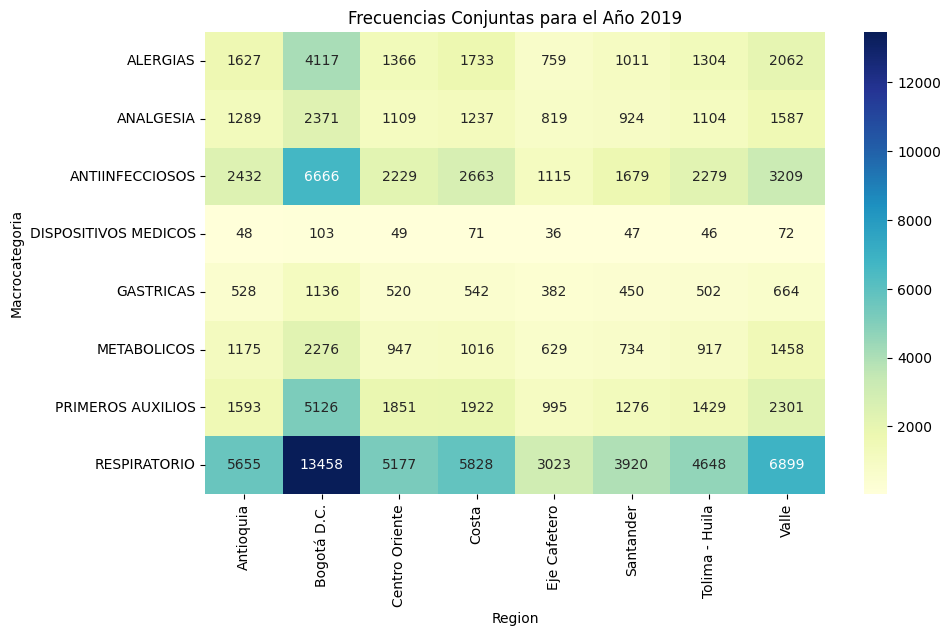

In [ ]:
# Definir el año que quieres filtrar
año_deseado = 2019  # Reemplaza con el año que desees

# Aplicar el filtro por año
df_filtrado = df[df['Año'] == año_deseado]

# Calcular las frecuencias conjuntas de Macrocategoria y Region
frecuencias_conjuntas = pd.crosstab(df_filtrado['Macrocategoria'], df_filtrado['Region'])

# Crear un mapa de calor (heatmap) con Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(frecuencias_conjuntas, annot=True, cmap='YlGnBu', fmt='d')
plt.title(f'Frecuencias Conjuntas para el Año {año_deseado}')
plt.xlabel('Region')
plt.ylabel('Macrocategoria')
plt.show()


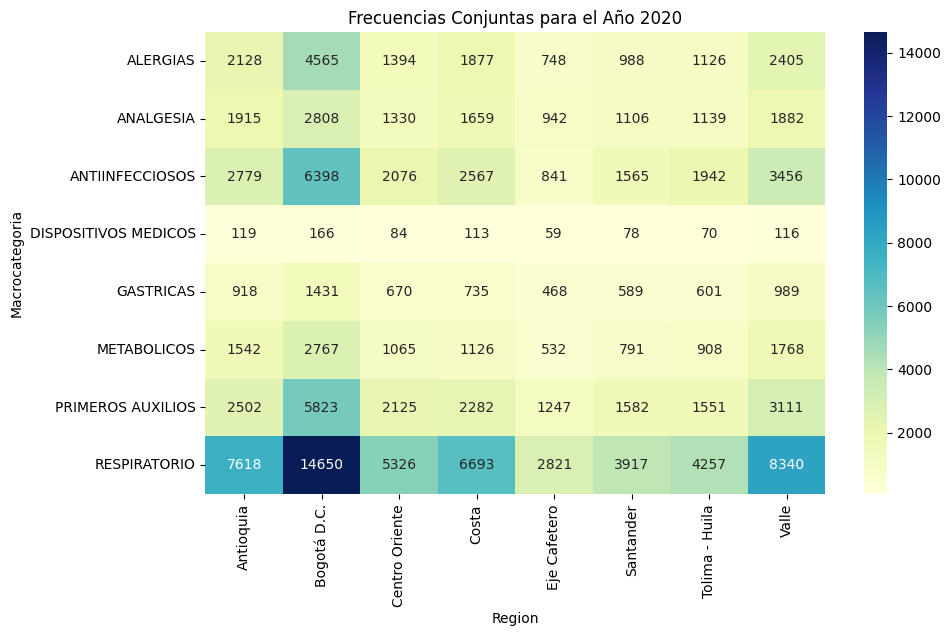

In [ ]:
# Definir el año que quieres filtrar
año_deseado = 2020  # Reemplaza con el año que desees

# Aplicar el filtro por año
df_filtrado = df[df['Año'] == año_deseado]

# Calcular las frecuencias conjuntas de Macrocategoria y Region
frecuencias_conjuntas = pd.crosstab(df_filtrado['Macrocategoria'], df_filtrado['Region'])

# Crear un mapa de calor (heatmap) con Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(frecuencias_conjuntas, annot=True, cmap='YlGnBu', fmt='d')
plt.title(f'Frecuencias Conjuntas para el Año {año_deseado}')
plt.xlabel('Region')
plt.ylabel('Macrocategoria')
plt.show()


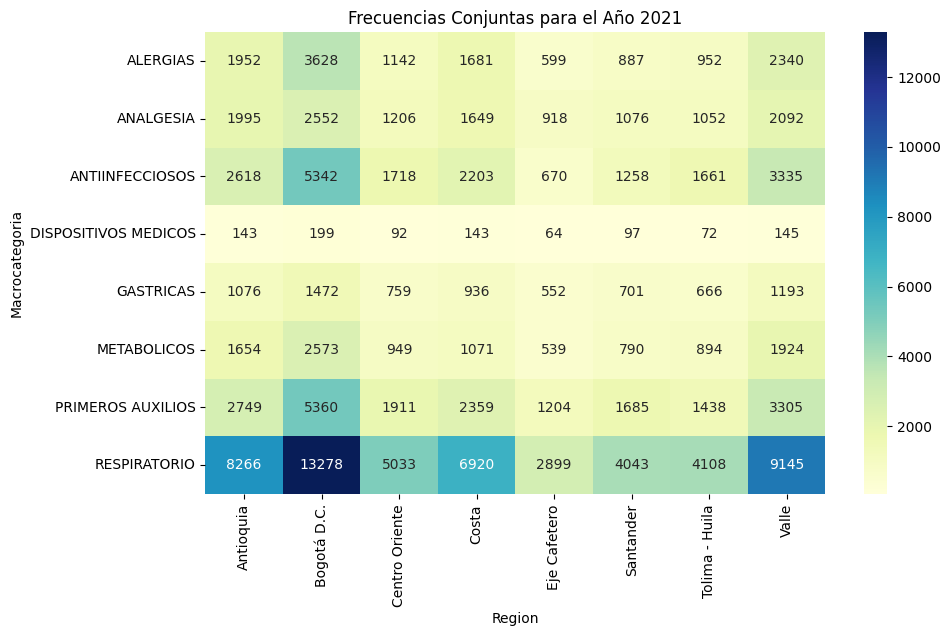

In [ ]:
# Definir el año que quieres filtrar
año_deseado = 2021  # Reemplaza con el año que desees

# Aplicar el filtro por año
df_filtrado = df[df['Año'] == año_deseado]

# Calcular las frecuencias conjuntas de Macrocategoria y Region
frecuencias_conjuntas = pd.crosstab(df_filtrado['Macrocategoria'], df_filtrado['Region'])

# Crear un mapa de calor (heatmap) con Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(frecuencias_conjuntas, annot=True, cmap='YlGnBu', fmt='d')
plt.title(f'Frecuencias Conjuntas para el Año {año_deseado}')
plt.xlabel('Region')
plt.ylabel('Macrocategoria')
plt.show()


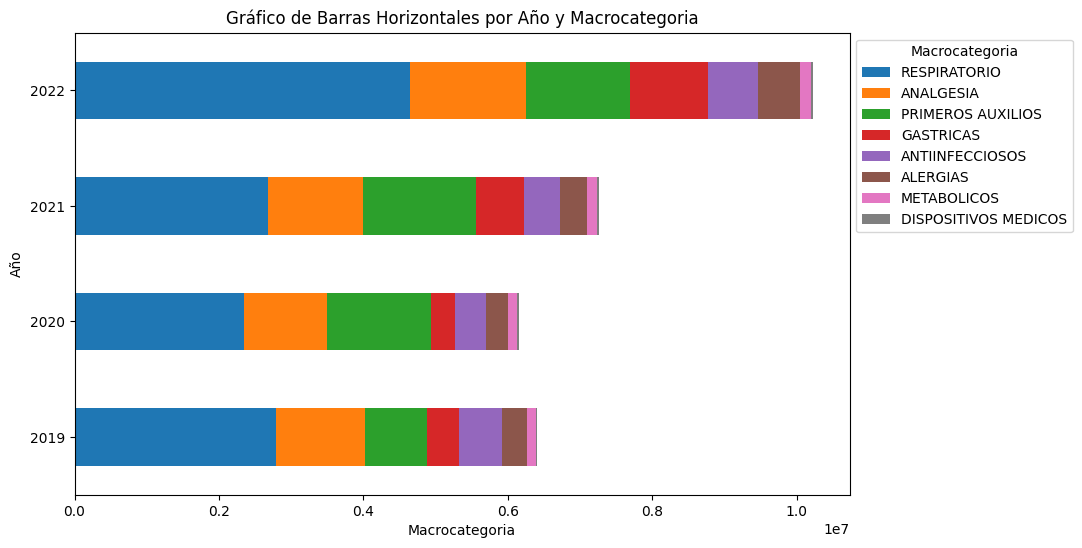

In [ ]:
# Agrupa los datos por 'Año' y 'Categoría' y calcula la suma de 'Cantidad'
grouped = df.groupby(['Año', 'Macrocategoria'])['Cantidad'].sum().unstack()

# Ordena las columnas en función de la cantidad total en el último año
grouped = grouped.sort_values(by=df['Año'].max(), axis=1, ascending=False)

# Crea un gráfico de barras horizontales apiladas
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6))

# Etiquetas de datos en las barras
#for i in ax.containers:
#    ax.bar_label(i)

# Etiquetas del eje x e y
plt.xlabel('Macrocategoria')
plt.ylabel('Año')
plt.legend(title='Macrocategoria', bbox_to_anchor=(1, 1))

# Título del gráfico
plt.title('Gráfico de Barras Horizontales por Año y Macrocategoria')

# Mostrar el gráfico
plt.show()


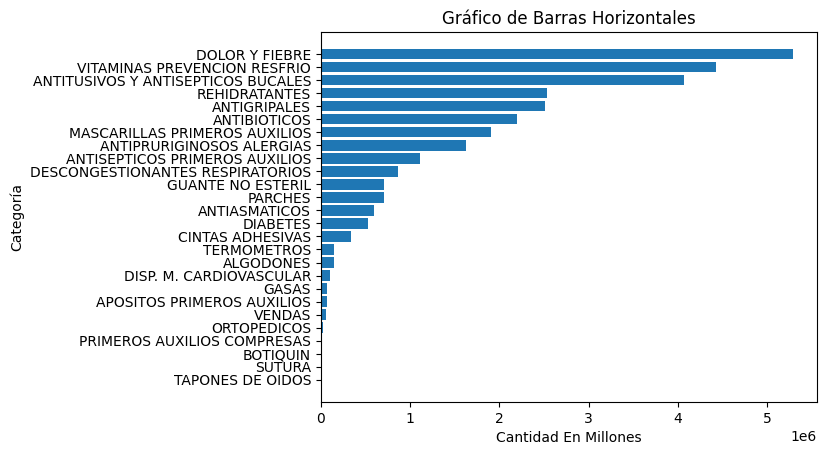

In [ ]:
# Agrupa y suma la cantidad por categoría
df_agrupado = df.groupby('Categoría')['Cantidad'].sum().reset_index()

# Ordena el DataFrame descendentemente por la columna 'Cantidad'
df_agrupado = df_agrupado.sort_values(by='Cantidad', ascending=True)

# Grafico de barras horizontales
plt.barh(df_agrupado['Categoría'], df_agrupado['Cantidad'])

# Etiquetas del eje x e y
plt.xlabel('Cantidad En Millones')
plt.ylabel('Categoría')

# Título del gráfico
plt.title('Gráfico de Barras Horizontales')

# Mostrar el gráfico
plt.show()
